# Analyze Alert Logs
## some date helper functions
- open issue : set locale to en_us ??

In [1]:
import datetime as dtt

In [40]:
import pandas as pd
import numpy as np

def custom_parser(s):
    return pd.datetime.strptime(s, '%a %b %d %H:%M:%S %Y')

# time data 'Sat Mar 31 08:05:01 2018' 


In [16]:
def elnp_f():
    df = pd.read_fwf('C:\\dev\\jupyter\\data\\solvias\\elnp\\alert_elnp11.log',header=None,names="l")              
    return df

df_alert_raw=elnp_f()

In [4]:
def isAlertDate(l):
    s=str(l)
    l=l[:3]
    
    days=['Sat','Sun','Mon','Tue','Wed','Thu','Fri']
    
    if l in days:
        return True
    
    return False
    
    if s.startswith('Sat'):
        return True
    elif s.startswith('Sun'):
        return True
    elif s.startswith('Mon'):
        return True
    elif s.startswith('Tue'):
        return True
    elif s.startswith('Wed'):
        return True
    elif s.startswith('Thu'):
        return True
    elif s.startswith('Fri'):
        return True

    return False

# Parsing Data
Parsing Date in a native python list of Series and then flushing the list of series directly into a dataframe

In [17]:
def getalert_df():
    df = pd.DataFrame(columns=['Date','line'])
    df_data = pd.DataFrame(columns=['Date','line'])
    df_data1 = pd.DataFrame(columns=['Date','line'])

    actDate=""
    i=0
    doInsert=0
    
    datalist = []
    
    
    for i, row in enumerate(df_alert_raw.itertuples(), 1):
        #if ( i%1000 == 0):
        #    print(i, row.l)
        line = row.l    
        if (isAlertDate(line)):
            actDate=line
            doInsert=1
            
        else:
            if doInsert == 1:                
                datalist.append(({'Date': actDate, 'line':line   }))
                i+=1   
    
    df = pd.DataFrame(datalist)
    
    return df    

In [19]:
df_alert=getalert_df()

#df_alert.tail(10)

df_alert[-10:]


Date  \
890040  Tue May 14 12:21:07 2019   
890041  Tue May 14 12:21:07 2019   
890042  Tue May 14 12:21:07 2019   
890043  Tue May 14 12:21:14 2019   
890044  Tue May 14 12:21:14 2019   
890045  Tue May 14 14:15:02 2019   
890046  Tue May 14 14:15:02 2019   
890047  Tue May 14 14:15:02 2019   
890048  Tue May 14 14:15:03 2019   
890049  Tue May 14 14:15:03 2019   

                                                                                                                      line  
890040  Thread 1 advanced to log sequence 277518 (LGWR switch)                                                              
890041  Current log# 3 seq# 277518 mem# 0: E:\ORACLE\ELNP11\REDO31_ELNP11.LOG                                               
890042  Current log# 3 seq# 277518 mem# 1: E:\ORACLE\ELNP11\REDO32_ELNP11.LOG                                               
890043  Deleted Oracle managed file F:\ORACLE\FAST_RECOVERY_AREA\ELNP11\ARCHIVELOG\2019_04_26\O1_MF_1_273594_GD6VQW6V_.ARC  
890044  Archived Log entry 275972 added for thread 1 sequence 277517 ID 0xbb952c86 dest 1:                                  
890045  Thread 1 advanced to log sequence 277519 (LGWR switch)                                                              
890046  Current log# 1 seq# 277519 mem# 0: E:\ORACLE\ELNP11\REDO11_ELNP11.LOG                                               
890047  Current log# 1 seq# 277519 mem# 1: E:\ORACLE\ELNP11\REDO12_ELNP11.LOG                                               
890048  Deleted Oracle managed file F:\ORACLE\FAST_RECOVERY_AREA\ELNP11\ARCHIVELOG\2019_04_26\O1_MF_1_273595_GD6VR8HN_.ARC  
890049  Archived Log entry 275973 added for thread 1 sequence 277518 ID 0xbb952c86 dest 1:

In [21]:
pd.set_option('display.max_colwidth', -1) 

# filter all ora messages
df_alert_ora=df_alert[df_alert['line'].str.contains("ORA-")]

df_a=df_alert_ora.copy()
df_a['Date1']=df_a['Date'].map (lambda x: custom_parser (x))
df_a['Month'] =  df_a['Date1'].map(lambda x: 100*x.year + x.month)
df_a = df_a.drop('Date', axis=1)

df_b = df_a[['Month','Date1','line']]

# rename columns as we want it
df_b = df_b.rename(index=str, columns={"Month": "Month", "Date1": "Date"})

df_alert_ora= df_b.copy()
df_alert_ora.tail(20)



Month                Date  \
612365  201901 2019-01-29 13:54:57   
612366  201901 2019-01-29 13:54:57   
612370  201901 2019-01-29 13:55:26   
612371  201901 2019-01-29 13:55:26   
612381  201901 2019-01-29 13:56:20   
612382  201901 2019-01-29 13:56:20   
711728  201903 2019-03-05 13:26:27   
711729  201903 2019-03-05 13:26:27   
711733  201903 2019-03-05 13:26:29   
711734  201903 2019-03-05 13:26:29   
782134  201904 2019-04-03 11:34:43   
782135  201904 2019-04-03 11:34:43   
871945  201905 2019-05-02 13:48:57   
871946  201905 2019-05-02 13:48:57   
879925  201905 2019-05-07 16:06:36   
879926  201905 2019-05-07 16:06:36   
879932  201905 2019-05-07 16:07:09   
879933  201905 2019-05-07 16:07:09   
879939  201905 2019-05-07 16:13:08   
879940  201905 2019-05-07 16:13:08   

                                                                        line  
612365  ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []  
612366  ORA-03149: Invalid Oracle error code                                  
612370  ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []  
612371  ORA-03149: Invalid Oracle error code                                  
612381  ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []  
612382  ORA-03149: Invalid Oracle error code                                  
711728  ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []  
711729  ORA-03149: Invalid Oracle error code                                  
711733  ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []  
711734  ORA-03149: Invalid Oracle error code                                  
782134  ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []  
782135  ORA-03149: Invalid Oracle error code                                  
871945  ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []  
871946  ORA-03149: Invalid Oracle error code                                  
879925  ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []  
879926  ORA-03149: Invalid Oracle error code                                  
879932  ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []  
879933  ORA-03149: Invalid Oracle error code                                  
879939  ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []  
879940  ORA-03149: Invalid Oracle error code

In [22]:
df_alert_ora.line.count()

107

In [23]:
df_alert_ora.groupby('line').count()

Month  \
line                                                                                                        
ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []                                30      
ORA-03149: Invalid Oracle error code                                                                30      
ORA-1537 signalled during: alter tablespace T_CS_NOTEBOOK9_TBL_16K                                  1       
ORA-1652: unable to extend temp segment by 128 in tablespace                 TA_CS_NOTEBOOK9_NB     17      
ORA-1652: unable to extend temp segment by 64 in tablespace                 T_CS_NOTEBOOK9_TBL_16K  12      
ORA-1652: unable to extend temp segment by 8192 in tablespace                 TA_CS_NOTEBOOK9_NB    17      

                                                                                                    Date  
line                                                                                                      
ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []                                30    
ORA-03149: Invalid Oracle error code                                                                30    
ORA-1537 signalled during: alter tablespace T_CS_NOTEBOOK9_TBL_16K                                  1     
ORA-1652: unable to extend temp segment by 128 in tablespace                 TA_CS_NOTEBOOK9_NB     17    
ORA-1652: unable to extend temp segment by 64 in tablespace                 T_CS_NOTEBOOK9_TBL_16K  12    
ORA-1652: unable to extend temp segment by 8192 in tablespace                 TA_CS_NOTEBOOK9_NB    17

    # create a distinct list of all ora messages

In [36]:
df_alert_ora['ORA'] = df_alert_ora['line'].str.extract('([ORA-]+\d+)', expand=False).str.strip()

df_alert_ora.tail(15)

Month                Date  \
612382  201901 2019-01-29 13:56:20   
711728  201903 2019-03-05 13:26:27   
711729  201903 2019-03-05 13:26:27   
711733  201903 2019-03-05 13:26:29   
711734  201903 2019-03-05 13:26:29   
782134  201904 2019-04-03 11:34:43   
782135  201904 2019-04-03 11:34:43   
871945  201905 2019-05-02 13:48:57   
871946  201905 2019-05-02 13:48:57   
879925  201905 2019-05-07 16:06:36   
879926  201905 2019-05-07 16:06:36   
879932  201905 2019-05-07 16:07:09   
879933  201905 2019-05-07 16:07:09   
879939  201905 2019-05-07 16:13:08   
879940  201905 2019-05-07 16:13:08   

                                                                        line  \
612382  ORA-03149: Invalid Oracle error code                                   
711728  ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []   
711729  ORA-03149: Invalid Oracle error code                                   
711733  ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []   
711734  ORA-03149: Invalid Oracle error code                                   
782134  ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []   
782135  ORA-03149: Invalid Oracle error code                                   
871945  ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []   
871946  ORA-03149: Invalid Oracle error code                                   
879925  ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []   
879926  ORA-03149: Invalid Oracle error code                                   
879932  ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []   
879933  ORA-03149: Invalid Oracle error code                                   
879939  ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []   
879940  ORA-03149: Invalid Oracle error code                                   

              ORA  
612382  ORA-03149  
711728  ORA-03137  
711729  ORA-03149  
711733  ORA-03137  
711734  ORA-03149  
782134  ORA-03137  
782135  ORA-03149  
871945  ORA-03137  
871946  ORA-03149  
879925  ORA-03137  
879926  ORA-03149  
879932  ORA-03137  
879933  ORA-03149  
879939  ORA-03137  
879940  ORA-03149

In [32]:
df_alert_ora_reduced=df_alert_ora[['Month','ORA']]
df_alert_ora_reduced.tail()
#Month, ora

Month        ORA
879926  201905  ORA-03149
879932  201905  ORA-03137
879933  201905  ORA-03149
879939  201905  ORA-03137
879940  201905  ORA-03149

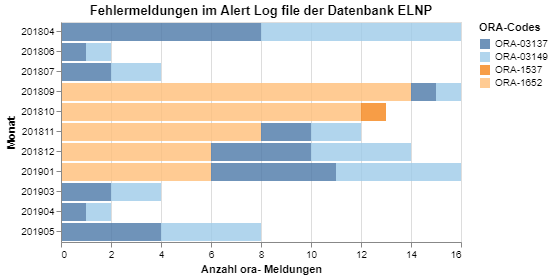

In [39]:
import altair as alt
from vega_datasets import data

alt.renderers.enable('notebook')

source = df_alert_ora_reduced

#https://vega.github.io/vega/docs/schemes/#reference

alt.Chart(source).mark_bar(opacity=0.8).encode(
    x=alt.X('count(ORA)',title='Anzahl ora- Meldungen'),
    y=alt.Y('Month:O',title='Monat'),
    color=alt.Color('ORA',legend=alt.Legend(title='ORA-Codes'), scale=alt.Scale(scheme='tableau20')),
    order=alt.Order(
      # Sort the segments of the bars by this field
      'Month',
      sort='ascending'
    )
).properties(title='Fehlermeldungen im Alert Log file der Datenbank ELNP')

- ORA-03149: Invalid Oracle error code
- ORA-03137: TTC protocol internal error : [3149] [] [] [] [] [] [] []
- ORA-1652: unable to extend temp segment by 64 in tablespace

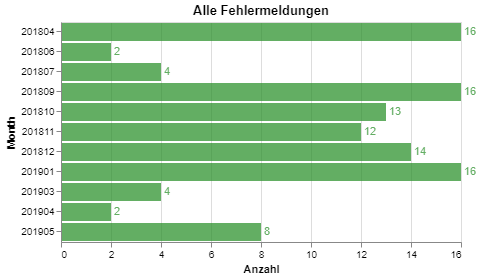

In [28]:
ts=df_alert_ora.set_index(["Month", "line"]).count(level="Month")
ts=ts.reset_index()
ts

import altair as alt
from vega_datasets import data

source = ts

bars = alt.Chart(source).mark_bar().encode(
    y='Month:O',
    x=alt.X("Date",title='Anzahl'),
    opacity=alt.value(0.7),
    color=alt.value('forestgreen')         
).properties(title="Alle Fehlermeldungen")

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Date:Q'
)

(bars + text)

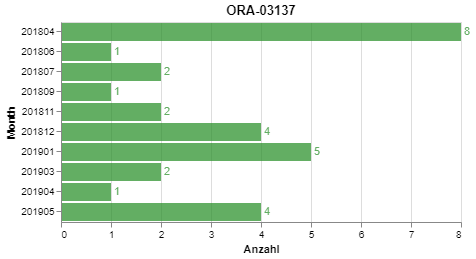

In [31]:
df_alert_orafiltered=df_alert_ora[df_alert_ora['line'].str.contains("ORA-03137")]
df_alert_orafiltered.reset_index()

ts=df_alert_orafiltered.set_index(["Month", "line"]).count(level="Month")
ts=ts.reset_index()
ts

import altair as alt
from vega_datasets import data

source = ts

bars = alt.Chart(source).mark_bar().encode(
    y='Month:O',
    x=alt.X("Date",title='Anzahl'),
    opacity=alt.value(0.7),
    color=alt.value('forestgreen')         
).properties(title="ORA-03137")

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Date:Q'
)

(bars + text)